In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import diff
from sympy.abc import x, y

In [16]:
# начальная точка
x0 = 40
y0 = 100
# шан
step = 0.00001
# величина ошибки
E = 0.001
batch_size = 10
granica_x = 1000
granica_y = 1000

In [17]:
# Исходная функция
def f(x,y):
    return x**3 + y**3 + (y-2)**2 + 5*x**2 + 3*x + 5*y + 10

# Определяем частные производные нашей функции 
def grad_f(x,y):
    df_dx = 3*x**2 + 10*x + 3
    df_dy = 3*y**2 + 2*y + 5
    return np.array([df_dx, df_dy])

In [18]:
# Определите функцию градиентного спуска
def gradient_descent(x0, y0, step, E):
    iterations = 0
    x = x0
    y = y0
    x_list = [x0]
    y_list = [y0]
    f_list = [f(x0, y0)]
    i = 0
    while True:
        grad = grad_f(x, y)
        x_new = x - step * grad[0]
        y_new = y - step * grad[1]
        x_list.append(x_new)
        y_list.append(y_new)
        f_new = f(x_new, y_new)
        f_list.append(f_new)
        if abs(f_new - f_list[i]) < E:
            print(f"Ошибка градиентного спуска {abs(f_new - f_list[i])} < E = 0.001")
            break
        if iterations > 70000:
            print('Iterations is over')
            print(f"Ошибка градиентного спуска {abs(f_new - f_list[i])} > E = 0.001")
            break
        x = x_new
        y = y_new
        i += 1
        iterations += 1
        if abs(x) > granica_x or abs(y) > granica_y:
            print(f'Граница достигнута в точке {x} {y} {f_new}')
            return x_list, y_list, f_list
    return x_list, y_list, f_list


In [19]:
# Определите функцию стохастического градиентного спуска
def stochastic_gradient_descent(x0, y0, step, E, batch_size):
    iterations = 0
    x = x0
    y = y0
    x_list = [x0]
    y_list = [y0]
    f_list = [f(x0, y0)]
    i = 0
    while True:
        batch_x = np.random.normal(loc=x, scale=0.1, size=batch_size)
        batch_y = np.random.normal(loc=y, scale=0.1, size=batch_size)
        grad = np.zeros(2)
        for j in range(batch_size):
            grad += grad_f(batch_x[j], batch_y[j])
        grad /= batch_size
        x_new = x - step * grad[0]
        y_new = y - step * grad[1]
        x_list.append(x_new)
        y_list.append(y_new)
        f_new = f(x_new, y_new)
        f_list.append(f_new)
        if abs(f_new - f_list[i]) < E:
            print(f"Ошибка стохастического градиентого спуска {abs(f_new - f_list[i])} < E = 0.001")
            break
        if iterations > 70000:
            print('Iterations is over')
            print(f"Ошибка стохастического градиентого спуска {abs(f_new - f_list[i])} > E = 0.001")
            break
        x = x_new
        y = y_new
        i += 1
        iterations += 1
        if abs(x) > granica_x or abs(y) > granica_y:
            print(f'Граница достигнута в точке {x} {y} {f_new}')
            return x_list, y_list, f_list
    return x_list, y_list, f_list

In [20]:
# Запустите алгоритм градиентного спуска
x_list, y_list, f_list = gradient_descent(x0, y0, step, E)
x_list_s, y_list_s, f_list_s = stochastic_gradient_descent(x0, y0, step, E, batch_size)

Ошибка градиентного спуска 0.0009999812157097665 < E = 0.001
Ошибка стохастического градиентого спуска 0.000996432307037054 < E = 0.001


Локальный минимум
Локальный минимум по методу градиентного спуска: 18.40544062730505
Точка: 0.30433641982866305 1.0001900170390527
Локальный минимум по методу схохастического градиентного спуска: 18.688093201345886
Точка: 0.3217111741227454 1.028162973765384
Граница достигнута в точке -210.22582537059333 -1023.3506934236511 -1079724904.7350614
Граница достигнута в точке -210.41800337356696 -1025.777587398218 -1087387799.7148948
Глобальный миниум
Мин значение градиентого спуска: -1079724904.7350614
Точка: -210.22582537059333 -1023.3506934236511
Мин значение стохастического градиентого спуска: -1087387799.7148948
Точка: -210.41800337356696 -1025.777587398218
Ошибка градиентного спуска 0.0009998081705120399 < E = 0.001
Ошибка стохастического градиентого спуска 0.000986840623028229 < E = 0.001
Minimum value stochastic: 18.334078142025376
Location: 0.513310815780338 0.648408415142002


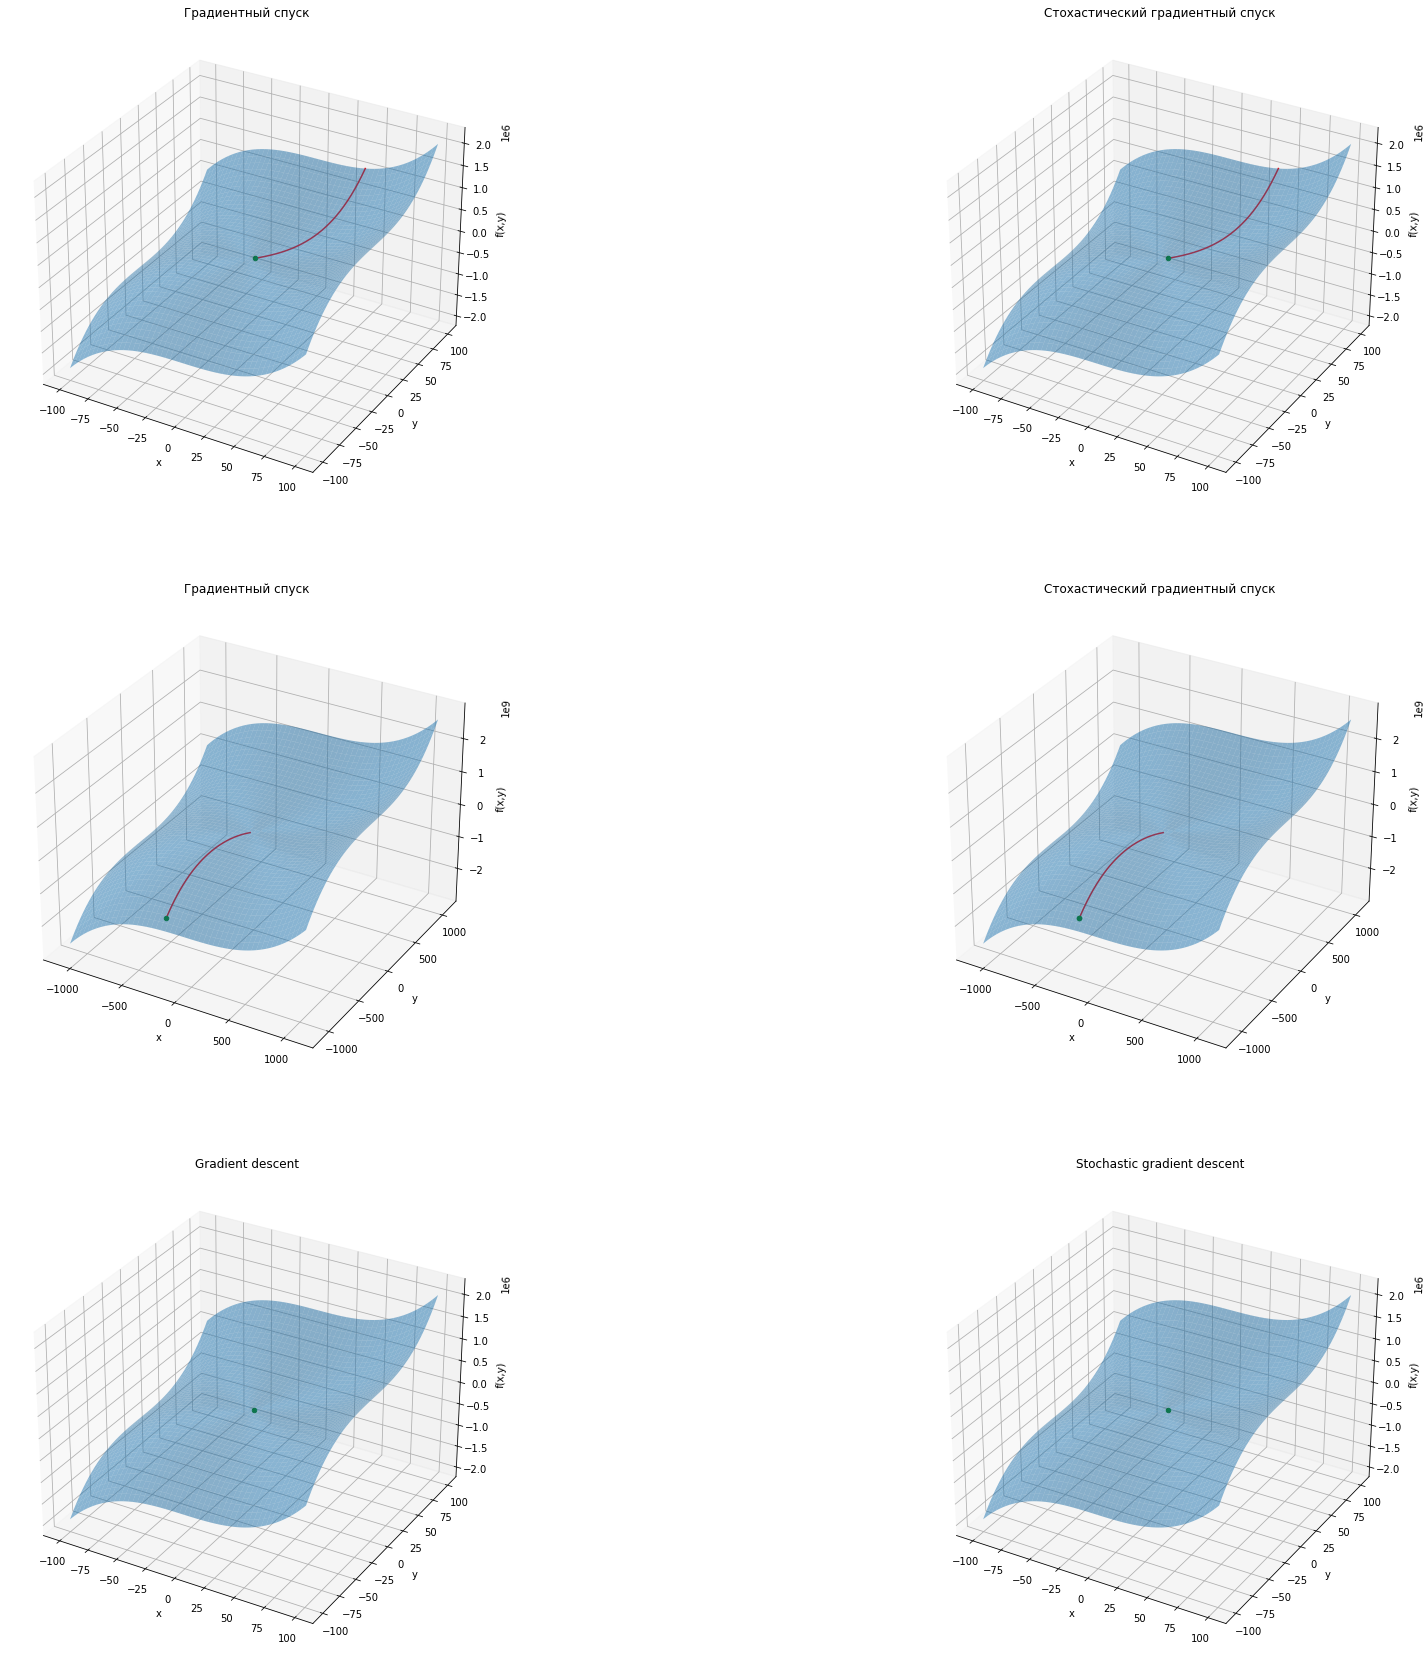

In [21]:
# Вывеодим минимальное значение и его местоположение
min_val = min(f_list)
min_loc = np.argmin(f_list)
x_min = x_list[min_loc]
y_min = y_list[min_loc]
print('Локальный минимум')
print("Локальный минимум по методу градиентного спуска:", min_val)
print("Точка:", x_min, y_min)

min_val_s = min(f_list_s)
min_loc_s = np.argmin(f_list_s)
x_min_s = x_list_s[min_loc_s]
y_min_s = y_list_s[min_loc_s]
print("Локальный минимум по методу схохастического градиентного спуска:", min_val_s)
print("Точка:", x_min_s, y_min_s)

# Строим график функции и текушей траектории градиентного спуска
fig = plt.figure(figsize = (30,30))
plt1 = fig.add_subplot(321, projection='3d')
plt2 = fig.add_subplot(322, projection='3d')
plt3 = fig.add_subplot(323, projection='3d')
plt4 = fig.add_subplot(324, projection='3d')
plt5 = fig.add_subplot(325, projection='3d')
plt6 = fig.add_subplot(326, projection='3d')

x = np.linspace(-100, 100, 10000)
y = np.linspace(-100, 100, 10000)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt1.plot_surface(X, Y, Z, alpha=0.5)
plt1.plot(x_list, y_list, f_list, color='r')
plt1.scatter(x_min, y_min, min_val, color='g', marker='o')
plt1.set_xlabel('x')
plt1.set_ylabel('y')
plt1.set_zlabel('f(x,y)')
plt1.title.set_text('Градиентный спуск')

plt2.plot_surface(X, Y, Z, alpha=0.5)
plt2.plot(x_list_s, y_list_s, f_list_s, color='r')
plt2.scatter(x_min_s, y_min_s, min_val_s, color='g', marker='o')
plt2.set_xlabel('x')
plt2.set_ylabel('y')
plt2.set_zlabel('f(x,y)')
plt2.title.set_text('Стохастический градиентный спуск')


# Вторая итерация алгоритма для поиска глобального минимума
x0 = -20
y0 = -20
x = np.linspace(-1100, 1100, 10000)
y = np.linspace(-1100, 1100, 10000)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

x_list2, y_list2, f_list2 = gradient_descent(x0, y0, step, E)
x_list_s2, y_list_s2, f_list_s2 = stochastic_gradient_descent(x0, y0, step, E, batch_size)

# Выводим минимальное значение и его местоположение
min_val2 = min(f_list2)
min_loc2 = np.argmin(f_list2)
x_min2 = x_list2[min_loc2]
y_min2 = y_list2[min_loc2]
print('Глобальный миниум')
print("Мин значение градиентого спуска:", min_val2)
print("Точка:", x_min2, y_min2)

min_val_s2 = min(f_list_s2)
min_loc_s2 = np.argmin(f_list_s2)
x_min_s2 = x_list_s2[min_loc_s2]
y_min_s2 = y_list_s2[min_loc_s2]
print("Мин значение стохастического градиентого спуска:", min_val_s2)
print("Точка:", x_min_s2, y_min_s2)

plt3.plot_surface(X, Y, Z, alpha=0.5)
plt3.plot(x_list2, y_list2, f_list2, color='r')
plt3.scatter(x_min2, y_min2, min_val2, color='g', marker='o')
plt3.set_xlabel('x')
plt3.set_ylabel('y')
plt3.set_zlabel('f(x,y)')
plt3.title.set_text('Градиентный спуск')

plt4.plot_surface(X, Y, Z, alpha=0.5)
plt4.plot(x_list_s2, y_list_s2, f_list_s2, color='r')
plt4.scatter(x_min_s2, y_min_s2, min_val_s2, color='g', marker='o')
plt4.scatter(x_list_s2[-1], y_list_s2[-1], f_list_s2[-1], color='g', marker='o')
plt4.set_xlabel('x')
plt4.set_ylabel('y')
plt4.set_zlabel('f(x,y)')
plt4.title.set_text('Стохастический градиентный спуск')

x0 = 1
y0 = 1

x = np.linspace(-100, 100, 10000)
y = np.linspace(-100, 100, 10000)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

x_list, y_list, f_list = gradient_descent(x0, y0, step, E)
x_list_s, y_list_s, f_list_s = stochastic_gradient_descent(x0, y0, step, E, batch_size)

min_val = min(f_list)
min_loc = np.argmin(f_list)
x_min = x_list[min_loc]
y_min = y_list[min_loc]

min_val_s = min(f_list_s)
min_loc_s = np.argmin(f_list_s)
x_min_s = x_list_s[min_loc_s]
y_min_s = y_list_s[min_loc_s]

print("Minimum value stochastic:", min_val_s)
print("Location:", x_min_s, y_min_s)

plt5.plot_surface(X, Y, Z, alpha=0.5)
plt5.plot(x_list, y_list, f_list, color='r')
plt5.scatter(x_min, y_min, min_val, color='g', marker='o')
plt5.set_xlabel('x')
plt5.set_ylabel('y')
plt5.set_zlabel('f(x,y)')
plt5.title.set_text('Gradient descent')

plt6.plot_surface(X, Y, Z, alpha=0.5)
plt6.plot(x_list_s, y_list_s, f_list_s, color='r')
plt6.scatter(x_min_s, y_min_s, min_val_s, color='g', marker='o')
plt6.set_xlabel('x')
plt6.set_ylabel('y')
plt6.set_zlabel('f(x,y)')
plt6.title.set_text('Stochastic gradient descent')

plt.show()